## Day 01- Wrangling with Data / Data Quality and Preprocessing


  1. Dealing with Dates
  2. Missing Data Imputation
  3. Removing Duplicates
  4. Outllier detection
  5. Discretize/Bin a Variable in Python
          -Using Pandas (pd.cut)
          -Using Numpy (np.digitize)

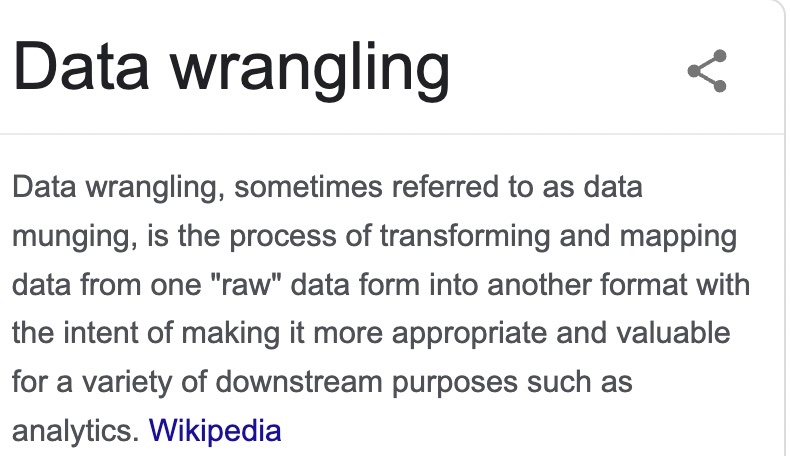

**The main function of Data Wrangling maybe cncerned with Structuring of data** however data wrangling can include all steps below-

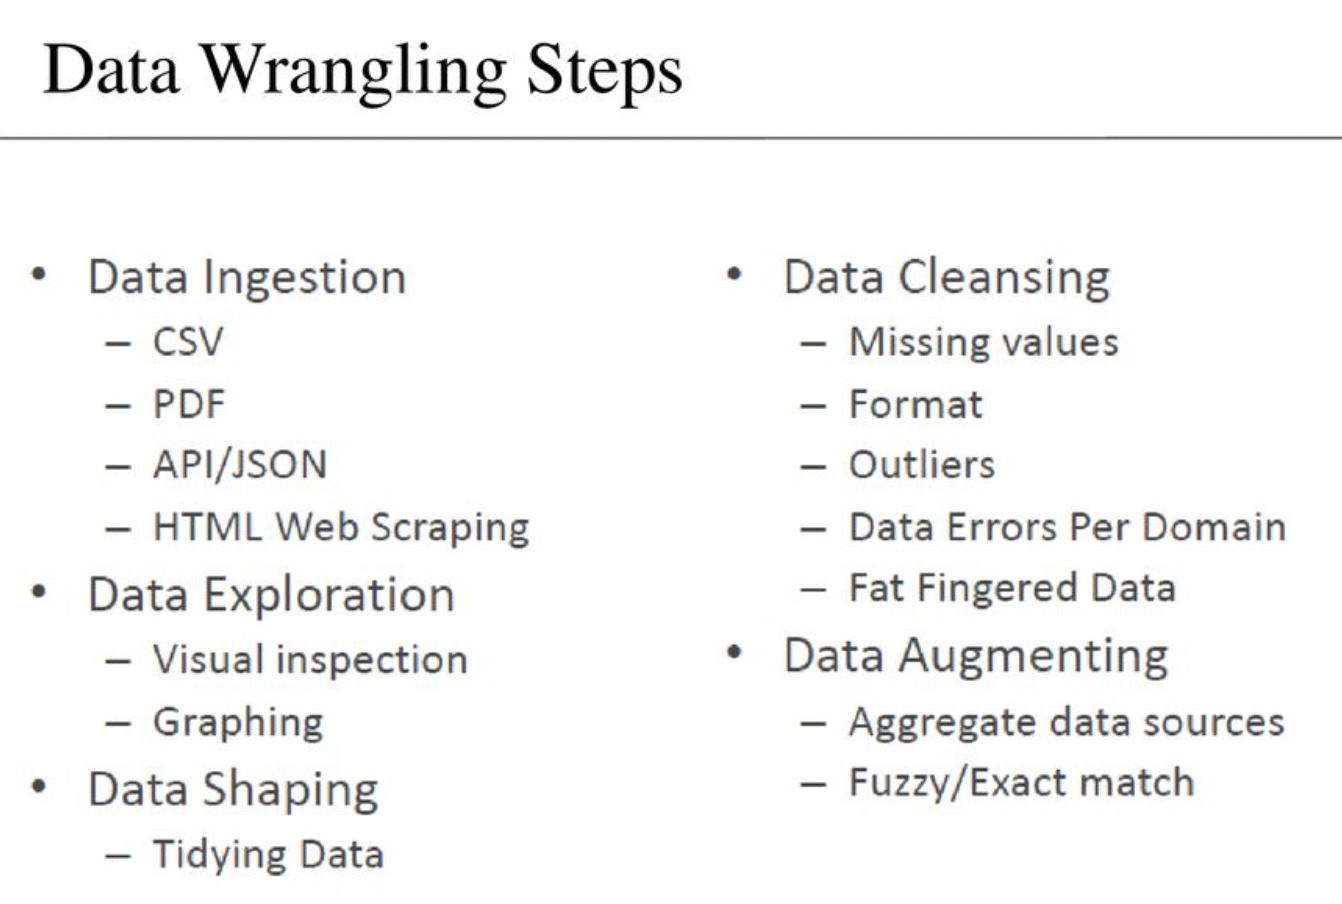

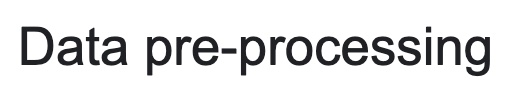

**It is majorly concerned with activities that are in connection with preparation of data w.r.t modelling**. E.g. if ML algorithms cannot accept categorical data u need to change to numbers first/label encoding. E.g. Some ML algorithms cannot accept missing data. Other e.g. could be feature engineering for better working of model. Mostly activities concerned so as to make data ready for modelling purpose is under Data Pre-processing activities.

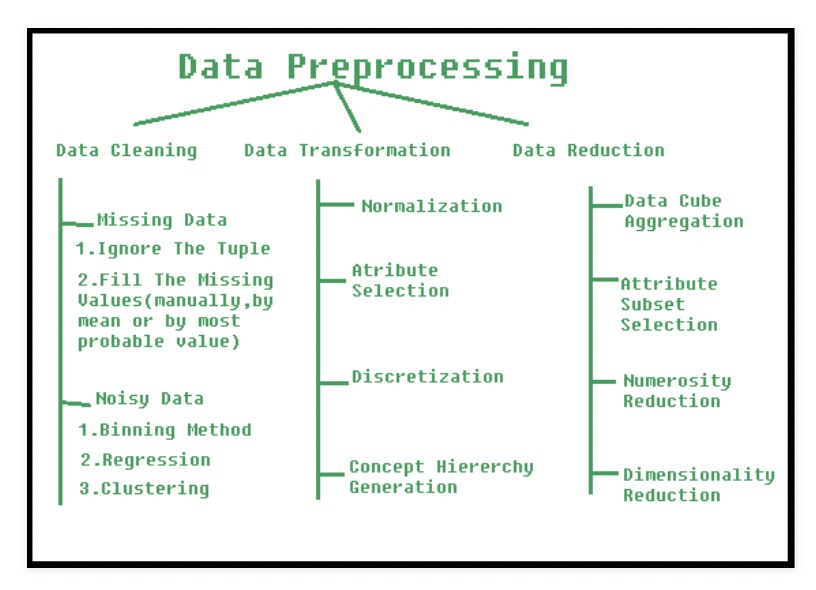

#### Dealing with Dates

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({
    'product_cat': ['X', 'Y','X', 'Y', 'Z', 'Y', 'X'],
    'sales Qty': [42,23,64,13,30,30,54],
    'sale_date': ['2022/January/15', '2022/January/15', '2022/January/12', '30Jan2022', '2022/February/05', '2022/February/06','2022/march/12'],
    'audit_date': ['2022/March/31', '2022/March/31', '2022/March/31', '2022/March/31', '2022/March/31', '2022/March/31','2022/March/31'],
    'revenue': [1000,12000,8000,4000,18000,1000,19000]
})

In [3]:
df

,product_cat,sales Qty,sale_date,audit_date,revenue
0,X,42,2022/January/15,2022/March/31,1000
1,Y,23,2022/January/15,2022/March/31,12000
2,X,64,2022/January/12,2022/March/31,8000
3,Y,13,30Jan2022,2022/March/31,4000
4,Z,30,2022/February/05,2022/March/31,18000
5,Y,30,2022/February/06,2022/March/31,1000
6,X,54,2022/march/12,2022/March/31,19000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_cat  7 non-null      object
 1   sales Qty    7 non-null      int64 
 2   sale_date    7 non-null      object
 3   audit_date   7 non-null      object
 4   revenue      7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


## 1- Handling the Date Column

1. Changing to appropriate data type (datetime) instead of object data type.
2. Creating new year and month columns from existing date column.
3. Feature Engineering by creating the new weekend column which can be insightful in analysis.
4. Datetimes and Timedeltas datatypes work together to provide ways for simple datetime calculations.


https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior -Additional Documentation

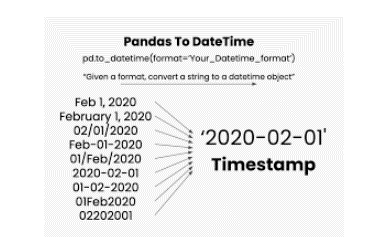


In [5]:
from datetime import date
today = date.today()
print("Current date =", today)

Current date = 2022-06-16


In [6]:
from datetime import datetime
today = datetime.today()
print("Current date =", today)

Current date = 2022-06-16 16:06:19.602151


Python interpreted sale_date, audit_date as object data type so we change these to datetime type using pandas datetime function.

In [7]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['audit_date'] = pd.to_datetime(df['audit_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   product_cat  7 non-null      object        
 1   sales Qty    7 non-null      int64         
 2   sale_date    7 non-null      datetime64[ns]
 3   audit_date   7 non-null      datetime64[ns]
 4   revenue      7 non-null      int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 408.0+ bytes


In [8]:
df

,product_cat,sales Qty,sale_date,audit_date,revenue
0,X,42,2022-01-15,2022-03-31,1000
1,Y,23,2022-01-15,2022-03-31,12000
2,X,64,2022-01-12,2022-03-31,8000
3,Y,13,2022-01-30,2022-03-31,4000
4,Z,30,2022-02-05,2022-03-31,18000
5,Y,30,2022-02-06,2022-03-31,1000
6,X,54,2022-03-12,2022-03-31,19000


Creating sale_year and sale_month as 2 new columns from sale_date column.
dt function is used to extract datetime related functions.

- Series.dt.year attribute to return the year of the datetime
- Series.dt.month attribute to return the month of the datetime

In [12]:
df['sale_year'] = df['sale_date'].dt.year
df['sale_month'] = df['sale_date'].dt.month
df

,product_cat,sales Qty,sale_date,audit_date,revenue,sale_year,sale_month,weekend
0,X,42,2022-01-15,2022-03-31,1000,2022,1,True
1,Y,23,2022-01-15,2022-03-31,12000,2022,1,True
2,X,64,2022-01-12,2022-03-31,8000,2022,1,False
3,Y,13,2022-01-30,2022-03-31,4000,2022,1,True
4,Z,30,2022-02-05,2022-03-31,18000,2022,2,True
5,Y,30,2022-02-06,2022-03-31,1000,2022,2,True
6,X,54,2022-03-12,2022-03-31,19000,2022,3,True


Pandas Series.dt.day_name() function return the day names of the DateTimeIndex with specified locale.

In [13]:
df['sale_date'].dt.day_name()

0     Saturday
1     Saturday
2    Wednesday
3       Sunday
4     Saturday
5       Sunday
6     Saturday
Name: sale_date, dtype: object

In [10]:
df['weekend'] = df['sale_date'].dt.day_name().isin(['Saturday', 'Sunday'])
df

,product_cat,sales Qty,sale_date,audit_date,revenue,sale_year,sale_month,weekend
0,X,42,2022-01-15,2022-03-31,1000,2022,1,True
1,Y,23,2022-01-15,2022-03-31,12000,2022,1,True
2,X,64,2022-01-12,2022-03-31,8000,2022,1,False
3,Y,13,2022-01-30,2022-03-31,4000,2022,1,True
4,Z,30,2022-02-05,2022-03-31,18000,2022,2,True
5,Y,30,2022-02-06,2022-03-31,1000,2022,2,True
6,X,54,2022-03-12,2022-03-31,19000,2022,3,True


- NumPy allows the subtraction of two Datetime values, an operation which produces a number with a time unit. In this dataframe we create a column "Delta' to show this datatype.

- In python, the timedelta64 data type was created to complement datetime64.
- Datetimes and Timedeltas work together to provide ways for simple datetime calculations.





In [23]:
from datetime import date, timedelta, datetime
df['Delta'] = df['audit_date']-df['sale_date']
df

,product_cat,sales Qty,sale_date,audit_date,revenue,sale_year,sale_month,weekend,Delta,diff_Weeks,diff_Months
0,X,42,2022-01-15,2022-03-31,1000,2022,1,True,75 days,10.714286,2.464116
1,Y,23,2022-01-15,2022-03-31,12000,2022,1,True,75 days,10.714286,2.464116
2,X,64,2022-01-12,2022-03-31,8000,2022,1,False,78 days,11.142857,2.562681
3,Y,13,2022-01-30,2022-03-31,4000,2022,1,True,60 days,8.571429,1.971293
4,Z,30,2022-02-05,2022-03-31,18000,2022,2,True,54 days,7.714286,1.774164
5,Y,30,2022-02-06,2022-03-31,1000,2022,2,True,53 days,7.571429,1.741309
6,X,54,2022-03-12,2022-03-31,19000,2022,3,True,19 days,2.714286,0.624243


The arguments for timedelta64 are a number, to represent the number of units, and a date/time unit, such as (D)ay, (W)eek, (M)onth, (Y)ear, (h)ours, (m)inutes, or (s)econds.

In [15]:
df['diff_Weeks']=df['Delta']/np.timedelta64(1,'W')
df

,product_cat,sales Qty,sale_date,audit_date,revenue,sale_year,sale_month,weekend,Delta,diff_Weeks
0,X,42,2022-01-15,2022-03-31,1000,2022,1,True,75 days,10.714286
1,Y,23,2022-01-15,2022-03-31,12000,2022,1,True,75 days,10.714286
2,X,64,2022-01-12,2022-03-31,8000,2022,1,False,78 days,11.142857
3,Y,13,2022-01-30,2022-03-31,4000,2022,1,True,60 days,8.571429
4,Z,30,2022-02-05,2022-03-31,18000,2022,2,True,54 days,7.714286
5,Y,30,2022-02-06,2022-03-31,1000,2022,2,True,53 days,7.571429
6,X,54,2022-03-12,2022-03-31,19000,2022,3,True,19 days,2.714286


In [29]:
print(type(df['sale_date']))
print('weekend col-', df['weekend'].dtype)
print('sale_date col-',df['sale_date'].dtype)
print('Delta col-',df['Delta'].dtype)
print('diff_Weeks col-',df['diff_Weeks'].dtype)

<class 'pandas.core.series.Series'>
weekend col- bool
sale_date col- datetime64[ns]
Delta col- timedelta64[ns]
diff_Weeks col- float64


**Note**

- As we observe above Delta column has datatype as timedelta64[ns] which is different from object,float,str etc data types.This datatype is not much used in structured.csv data but mostly used in time series data.
- Default datetime format is is YYYY-MM-DD.


In [16]:
df['diff_Months']=df['Delta']/np.timedelta64(1,'M')
df

,product_cat,sales Qty,sale_date,audit_date,revenue,sale_year,sale_month,weekend,Delta,diff_Weeks,diff_Months
0,X,42,2022-01-15,2022-03-31,1000,2022,1,True,75 days,10.714286,2.464116
1,Y,23,2022-01-15,2022-03-31,12000,2022,1,True,75 days,10.714286,2.464116
2,X,64,2022-01-12,2022-03-31,8000,2022,1,False,78 days,11.142857,2.562681
3,Y,13,2022-01-30,2022-03-31,4000,2022,1,True,60 days,8.571429,1.971293
4,Z,30,2022-02-05,2022-03-31,18000,2022,2,True,54 days,7.714286,1.774164
5,Y,30,2022-02-06,2022-03-31,1000,2022,2,True,53 days,7.571429,1.741309
6,X,54,2022-03-12,2022-03-31,19000,2022,3,True,19 days,2.714286,0.624243


## 2 - Handling Missing Data by Imputation

In [3]:
# Nan Vs None
print(type(np.nan))
print(type(None))

<class 'float'>
<class 'NoneType'>


In [4]:
import pandas as pd
s = pd.Series([3,None])
s

0    3.0
1    NaN
dtype: float64

In [7]:
import pandas as pd
s = pd.Series([3,None,'3'])
s

0       3
1    None
2       3
dtype: object

The resulting Series contains a NaN instead of None. This is because Pandas automatically converted None to NaN given that the other value (3) is a numeric, which then allows the column type to be float64.

In [5]:
s = pd.Series(["3",None])
s

0       3
1    None
dtype: object

In [34]:
# Replace None with NaN in pandas dataframe
s.fillna(value=np.nan, inplace=True)
s

0      3
1    NaN
dtype: object

In [35]:
# Sample data
data=pd.read_csv("mdata.csv")
data.head()

,Prod.catagory,Qyt Sales,Rate Per Qty,Sales Person,Sales Revenue
0,A,10.0,100,Ram,1000.0
1,B,7.0,70,Govind,490.0
2,C,7.0,35,Sameer,245.0
3,D,8.0,67,NaN,536.0
4,E,NaN,70,NaN,NaN


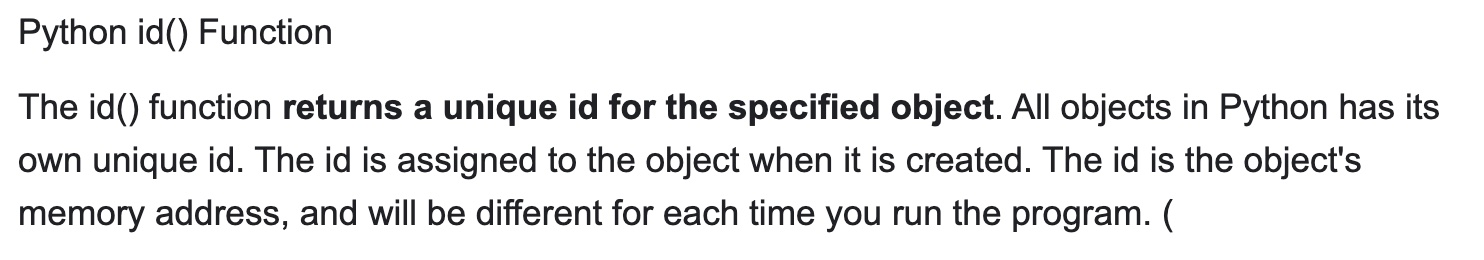

In [38]:
# Usage of None
var = None
print(var)
print(type(var))
print(id(var))

None
<class 'NoneType'>
4311787624


In [39]:
name = 'sylvia'
print(id(name))

140425723525872


In [40]:
num = 8
print(id(num))

4312089952


### Missing value imputations
Built in functions to  handle the missing data.
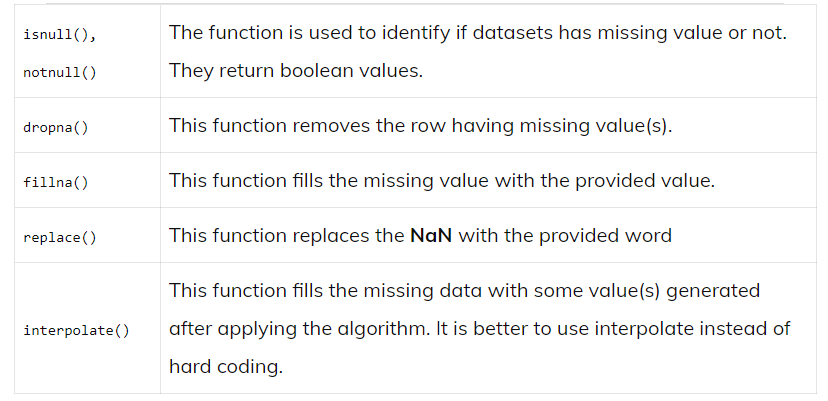

###  Example-1 for missing value imputations<br>

In [42]:
# Example-1
Data=pd.read_csv('Data.csv')
Data

,Part,Feature,Price
0,Monitor,LED,12.0
1,CPU,i7,3500.0
2,NaN,RGB,NaN
3,Mouse,Wireless,1200.0
4,NaN,Zebronics,NaN
5,Extensions,NaN,250.0
6,Table,Urban Clap,7000.0
7,Chair,Apex Chairs,12000.0
8,Wifi,Airtel,799.0


### isnull()
notnull() returns results opposite of those obtained in isnull()

In [43]:
#isnull()
#returns True for all the missing values & False for all the occupied values.
Data.isnull()

,Part,Feature,Price
0,False,False,False
1,False,False,False
2,True,False,True
3,False,False,False
4,True,False,True
5,False,True,False
6,False,False,False
7,False,False,False
8,False,False,False


### notnull()

In [44]:
#notnull()
#returns True for all the occupied values and False for the missing value.
Data.notnull()

,Part,Feature,Price
0,True,True,True
1,True,True,True
2,False,True,False
3,True,True,True
4,False,True,False
5,True,False,True
6,True,True,True
7,True,True,True
8,True,True,True


### dropna()

In [45]:
#dropna()
#dropna removes the entire row having missing value
Data1=Data.dropna()
Data1

,Part,Feature,Price
0,Monitor,LED,12.0
1,CPU,i7,3500.0
3,Mouse,Wireless,1200.0
6,Table,Urban Clap,7000.0
7,Chair,Apex Chairs,12000.0
8,Wifi,Airtel,799.0


### replace()

In [49]:
#replace()
#to_replace & value are the necessary parameters

Data2=Data.replace(to_replace= 12, value=12000)
print(Data)
Data2

         Part      Feature    Price
0     Monitor          LED     12.0
1         CPU           i7   3500.0
2         NaN          RGB      NaN
3       Mouse     Wireless   1200.0
4         NaN    Zebronics      NaN
5  Extensions          NaN    250.0
6       Table   Urban Clap   7000.0
7       Chair  Apex Chairs  12000.0
8        Wifi       Airtel    799.0


,Part,Feature,Price
0,Monitor,LED,12000.0
1,CPU,i7,3500.0
2,NaN,RGB,NaN
3,Mouse,Wireless,1200.0
4,NaN,Zebronics,NaN
5,Extensions,NaN,250.0
6,Table,Urban Clap,7000.0
7,Chair,Apex Chairs,12000.0
8,Wifi,Airtel,799.0


### fillna()

In [50]:
#Fillna
# replace nan to zero
Data3=Data['Price'].fillna(0)
print(Data)
Data3

         Part      Feature    Price
0     Monitor          LED     12.0
1         CPU           i7   3500.0
2         NaN          RGB      NaN
3       Mouse     Wireless   1200.0
4         NaN    Zebronics      NaN
5  Extensions          NaN    250.0
6       Table   Urban Clap   7000.0
7       Chair  Apex Chairs  12000.0
8        Wifi       Airtel    799.0


0       12.0
1     3500.0
2        0.0
3     1200.0
4        0.0
5      250.0
6     7000.0
7    12000.0
8      799.0
Name: Price, dtype: float64

In [53]:
# isnull.sum
print(Data)
Data.isnull().sum()

         Part      Feature    Price
0     Monitor          LED     12.0
1         CPU           i7   3500.0
2         NaN          RGB      NaN
3       Mouse     Wireless   1200.0
4         NaN    Zebronics      NaN
5  Extensions          NaN    250.0
6       Table   Urban Clap   7000.0
7       Chair  Apex Chairs  12000.0
8        Wifi       Airtel    799.0


Part       2
Feature    1
Price      2
dtype: int64

### interpolate()

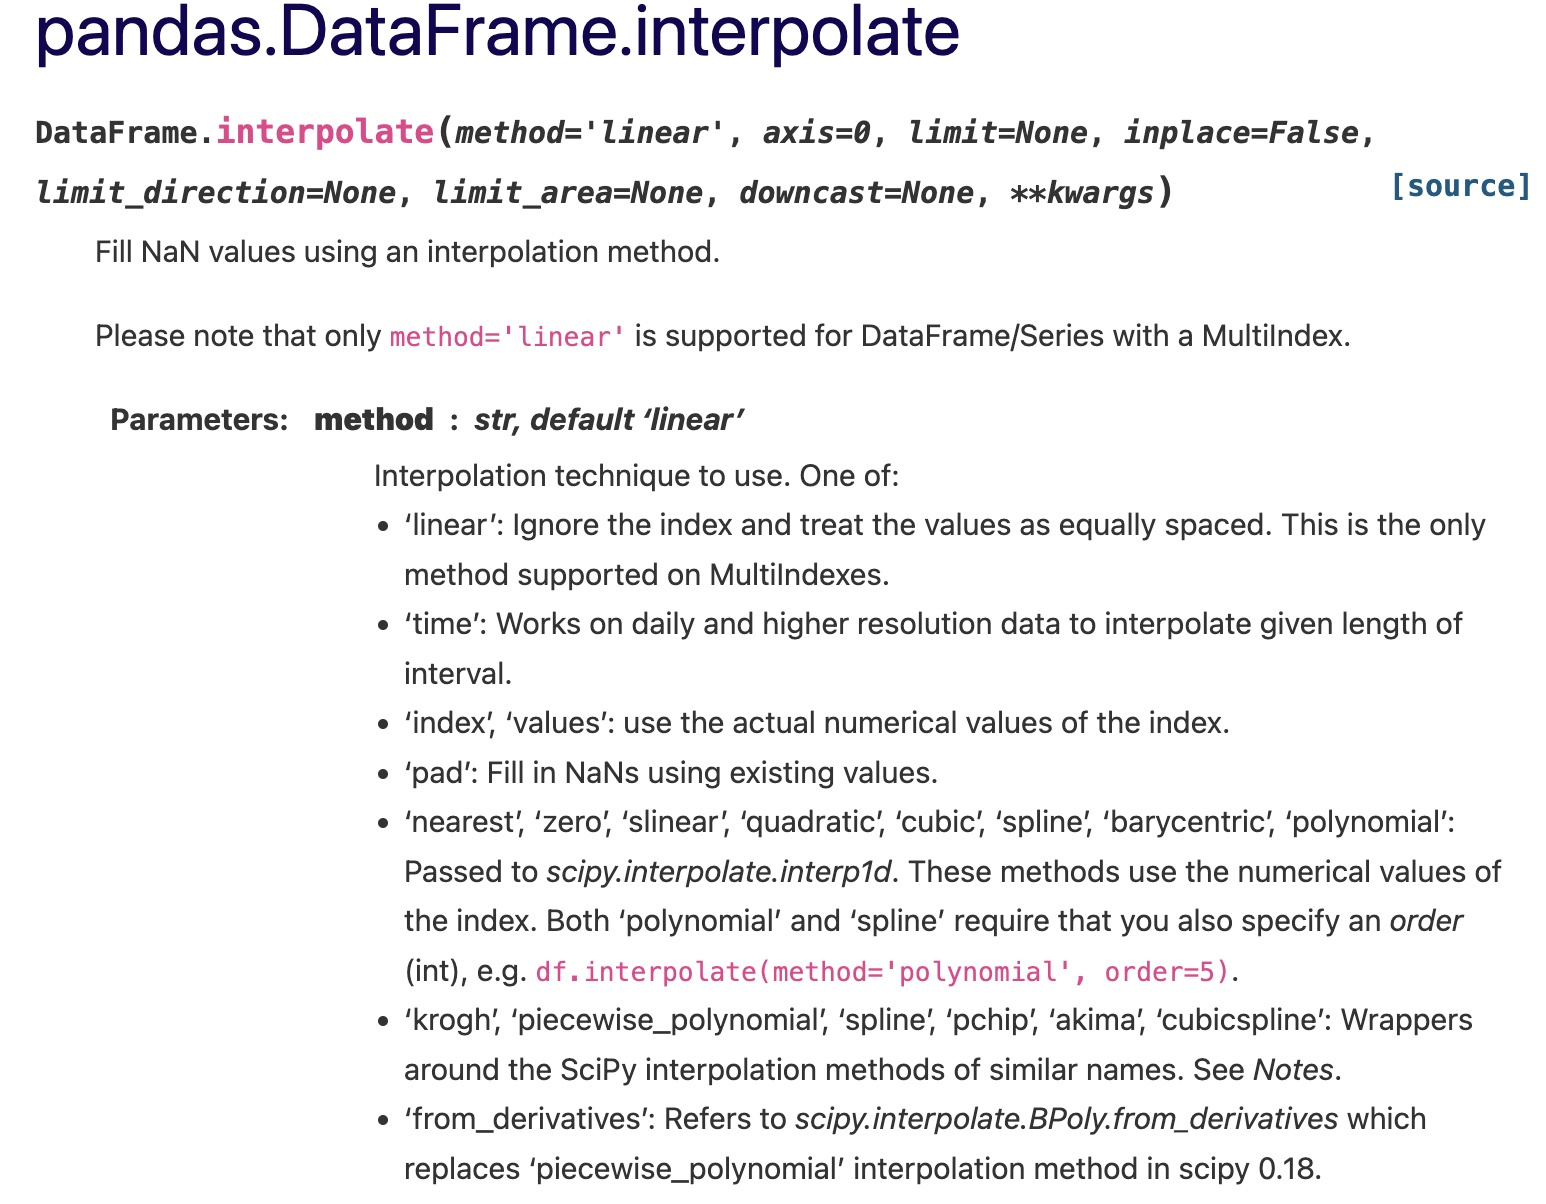

**Interpolate**

1. Interpolation is used to estimate points data points b/w 2 known points.
2. Most common interpolation technique is Linear.
3. Others are quadratic, cubic etc which is typlically Splines Interpolation.

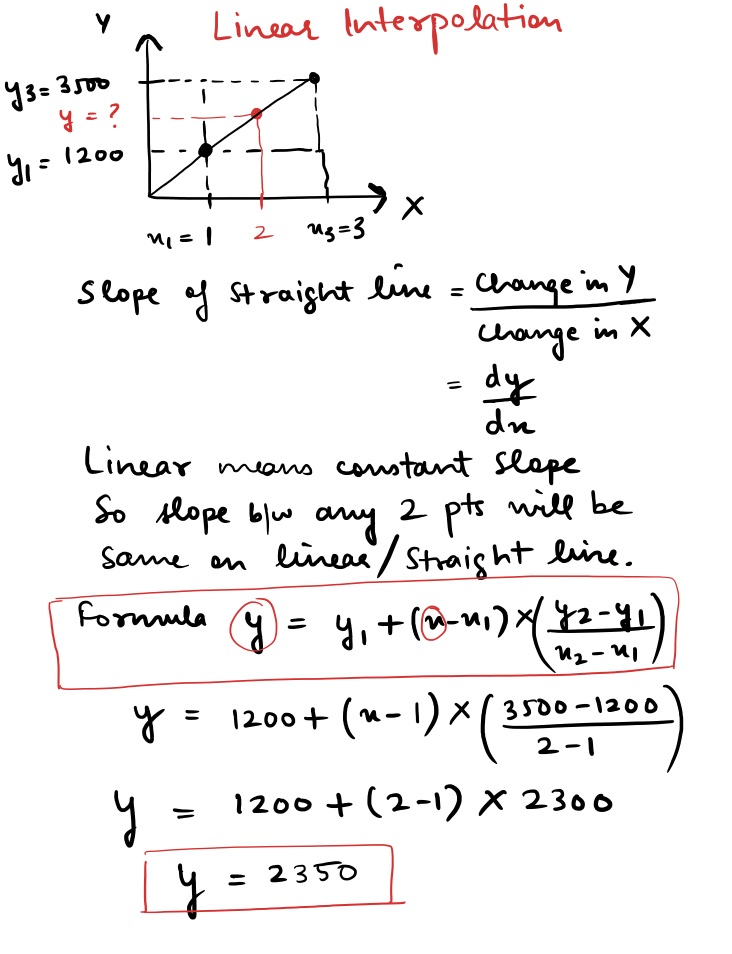

In [56]:
#filling missing values using interpolate
#interpolte uses linear method to generate value
#pay attention to the values inplace of NaN

Data4=Data.interpolate(method='linear')
print(Data)
Data4

         Part      Feature    Price
0     Monitor          LED     12.0
1         CPU           i7   3500.0
2         NaN          RGB      NaN
3       Mouse     Wireless   1200.0
4         NaN    Zebronics      NaN
5  Extensions          NaN    250.0
6       Table   Urban Clap   7000.0
7       Chair  Apex Chairs  12000.0
8        Wifi       Airtel    799.0


,Part,Feature,Price
0,Monitor,LED,12.0
1,CPU,i7,3500.0
2,NaN,RGB,2350.0
3,Mouse,Wireless,1200.0
4,NaN,Zebronics,725.0
5,Extensions,NaN,250.0
6,Table,Urban Clap,7000.0
7,Chair,Apex Chairs,12000.0
8,Wifi,Airtel,799.0


### Example-2 for missing value imputations<br>

There are more than one ways that can be considered before replacing missing values. Few of them are :
1. A constant value that has meaning within the domain, such as 0, distinct from all other values.
2. A value from another randomly selected record.
3. A mean, median, or mode value for the column. A median is more appropriate if there is skew in data.
4. Time series missing value Imputation
5. 95% and above missing value columns can be removed

In [4]:
#importing the dataset from kaggle
df1 = pd.read_csv("train.csv")
df1.columns

# 95% and above missing value columns can be removed

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df1.shape

(891, 12)

### Missing values per Column

In [7]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Remove missing columns
updated_df = df1.dropna(axis=1)
updated_df.columns
print(updated_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


In [9]:
df1.shape

(891, 12)

In [10]:
updated_df.shape

(891, 9)

### Missing values per Row

In [21]:
count=0
for i in range(len(df1.index)) :
    #print("Nan in row ", i , " : " ,  df1.iloc[i].isnull().sum())
    row = df1.iloc[i].isnull().sum()
    if row != 0:
        count = count+1
print("Nan in row ", i , " : " ,  df1.iloc[i].isnull().sum())
print("Total rows having missing values",count)

Nan in row  890  :  1
Total rows having missing values 708


In [99]:
print('Rows which have atleast 1 missing value = ',count)

Rows which have atleast 1 missing value =  708


In [22]:
# Remove only missing rows
updated_df1 = df1.dropna(axis=0)
updated_df1.shape

(183, 12)

### Missing value imputation with the mean or median value if it’s a numerical variable.
### Missing value imputation with mode if it’s a categorical value.

In [23]:
df1['Age']=df1['Age'].fillna(df1['Age'].mean())

# Check if no missing value after fill with mean()
df1['Age'].isnull().sum()

0

In [24]:
df1['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
print(df1['Cabin'].isnull().sum())

687


In [26]:
print(df1['Cabin'].value_counts())
# As we can see from value_counts there are 3 modes each occur 4 times.

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


In [27]:
df1['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [28]:
# Since there are many modes for this Cabin column, so u just pick 1st one i.e. 0 index
df1['Cabin'].mode()[0]

'B96 B98'

In [29]:
df1['Cabin'] = df1['Cabin'].fillna(df1['Cabin'].mode()[0])

In [30]:
# Now after substituting na with mode= B96 B98, check value_counts again.
print(df1['Cabin'].value_counts())

B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 147, dtype: int64


In [31]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
print(df1['Cabin'].isnull().sum())

0


In [33]:
df1['Embarked'].mode()

0    S
dtype: object

In [34]:
df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode())

In [35]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
type(df1['Embarked'])

pandas.core.series.Series

###  If all categorical columns need to replace together for missing values.

In [37]:
# .iloc[0] so it picks only first mode (since there are multiple modes)

cols = ['Cabin','Embarked']

df1[cols]=df1[cols].fillna(df1[cols].mode().iloc[0])


### Distribution of Categorical variable using bar chart


Bad key text.latex.preview in file /Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       

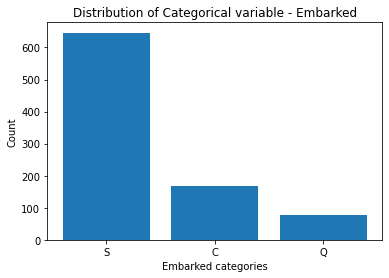

In [38]:
# Prepare data for bar chart using value counts for series

embarked_series = df1['Embarked'].value_counts()

# PLot
import matplotlib.pyplot as plt
plt.bar(embarked_series.index, embarked_series.values)
plt.title('Distribution of Categorical variable - Embarked')
plt.xlabel('Embarked categories')
plt.ylabel('Count');


In [40]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Missing value imputation with below 2 methods if it’s a time-series.


Time series is a sequence of observations recorded at regular time intervals. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time. 

**Method 1** : backfill – bfill : according to the last observed value & forwardfill – ffill : according to the next observed value

**Method 2** : Using Interpolate() Method

In [41]:
# there are four missing values
lst = [10001.0, 10002.0, 10003.0,10004.0, np.nan, np.nan, 10005.0, np.nan, 10000]
df2 = pd.DataFrame(lst)
df2

,0
0,10001.0
1,10002.0
2,10003.0
3,10004.0
4,NaN
5,NaN
6,10005.0
7,NaN
8,10000.0


In [42]:
gfg1 = df2.ffill()
# Filling forward
print("Using ffill() function:-")
print(gfg1)

Using ffill() function:-
         0
0  10001.0
1  10002.0
2  10003.0
3  10004.0
4  10004.0
5  10004.0
6  10005.0
7  10005.0
8  10000.0


In [43]:
# Filling backward
gfg2 = df2.bfill()
print("Using bfill() function:-")
print(gfg2)

Using bfill() function:-
         0
0  10001.0
1  10002.0
2  10003.0
3  10004.0
4  10005.0
5  10005.0
6  10005.0
7  10000.0
8  10000.0


#### Method 2: Using Interpolate() Method

The method is more complex than the above fillna() method. It consists of different methodologies, including ‘linear’, ‘quadratic’, ‘nearest’. 

In [57]:
# Using interpolate() to fill the missing 
print(df)

dataframe1 = df.interpolate(method='linear')
dataframe1

         0
0  10001.0
1  10002.0
2  10003.0
3  10004.0
4      NaN
5      NaN
6  10005.0
7      NaN
8  10000.0


,0
0,10001.000000
1,10002.000000
2,10003.000000
3,10004.000000
4,10004.333333
5,10004.666667
6,10005.000000
7,10002.500000
8,10000.000000


## 3 - Handling Duplicate Data
**Pandas Drop Duplicates**<br>
Removing duplicates is an essential skill to get accurate counts because you often don't want to count the same thing multiple times. 

drop_duplicates function.

In [61]:
Data=pd.read_csv("duplicate.csv")
Data

,Name,Department,Designation,Salary,Date of joining
0,Vineet,Software,Sr SDE,3500000,31/03/06
1,Vimal,Marketing,Manager,900000,09/08/16
2,Vikrant,Software,SDE,1200000,09/01/16
3,Varun,Software,SDE,900000,12/07/18
4,Vipul,Marketing,Agent,3500000,09/09/19
5,Vineet,Software,Sr SDE,3500000,31/03/06


In [115]:
# first occurence of these will be kept
Data.drop_duplicates( keep='first')
#df.drop_duplicates()

,Name,Department,Designation,Salary,Date of joining
0,Vineet,Software,Sr SDE,3500000,31/03/06
1,Vimal,Marketing,Manager,900000,09/08/16
2,Vikrant,Software,SDE,1200000,09/01/16
3,Varun,Software,SDE,900000,12/07/18
4,Vipul,Marketing,Agent,3500000,09/09/19


In [116]:
# dropping all the duplicate rows in a Department column
Data.drop_duplicates(subset='Department')

,Name,Department,Designation,Salary,Date of joining
0,Vineet,Software,Sr SDE,3500000,31/03/06
1,Vimal,Marketing,Manager,900000,09/08/16


In [117]:
# Here last occurence will be kept reemaining will be removed.
Data.drop_duplicates(subset='Department', keep='last')

,Name,Department,Designation,Salary,Date of joining
4,Vipul,Marketing,Agent,3500000,09/09/19
5,Vineet,Software,Sr SDE,3500000,31/03/06


In [118]:
# removing duplicates based on multile columns
print(Data)
Data.drop_duplicates(subset=['Designation', 'Date of joining'],keep= 'last')

      Name Department Designation   Salary Date of joining
0   Vineet   Software      Sr SDE  3500000        31/03/06
1    Vimal  Marketing     Manager   900000        09/08/16
2  Vikrant   Software         SDE  1200000        09/01/16
3    Varun   Software         SDE   900000        12/07/18
4    Vipul  Marketing       Agent  3500000        09/09/19
5   Vineet   Software      Sr SDE  3500000        31/03/06


,Name,Department,Designation,Salary,Date of joining
1,Vimal,Marketing,Manager,900000,09/08/16
2,Vikrant,Software,SDE,1200000,09/01/16
3,Varun,Software,SDE,900000,12/07/18
4,Vipul,Marketing,Agent,3500000,09/09/19
5,Vineet,Software,Sr SDE,3500000,31/03/06


## 4 - Handling (Detect & Remove) ouliers from the Dataset


**In data analysis transformation is the replacement of a variable by a function of that variable**: for example, replacing a variable x by the square root of x or the logarithm of x. 

What is An Outlier?

Outlier is an untypical observed data point in a given distribution of data points.

An outlier can be easily defined and visualized using a box-plot 

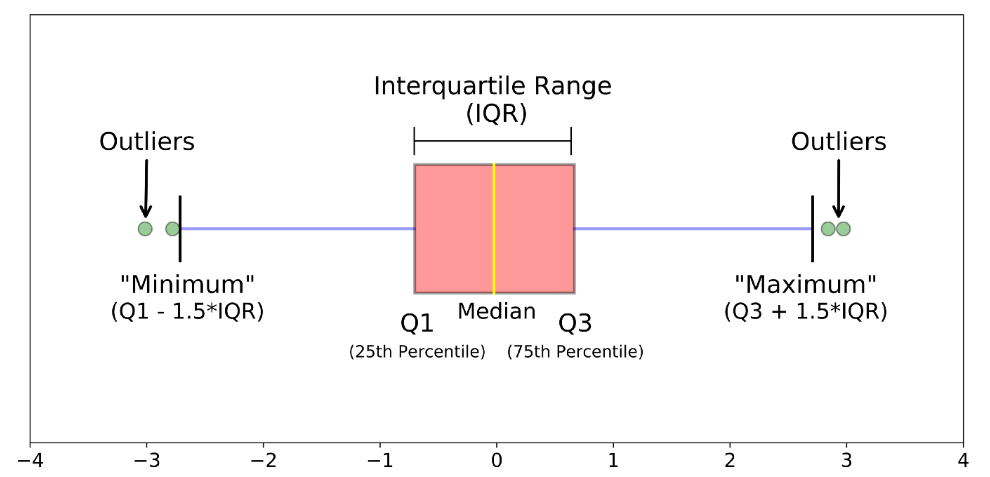

In [62]:
Performance=[75,76,15,99.5,73.5,75.7]
print(type(Performance))

# adding a new column to existing df Data
Data['Performance']=Performance
Data

<class 'list'>


,Name,Department,Designation,Salary,Date of joining,Performance
0,Vineet,Software,Sr SDE,3500000,31/03/06,75.0
1,Vimal,Marketing,Manager,900000,09/08/16,76.0
2,Vikrant,Software,SDE,1200000,09/01/16,15.0
3,Varun,Software,SDE,900000,12/07/18,99.5
4,Vipul,Marketing,Agent,3500000,09/09/19,73.5
5,Vineet,Software,Sr SDE,3500000,31/03/06,75.7


In [65]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
        
    # compute IRQ
    iqr = q3 - q1
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

In [66]:
#input data
detect_outlier(Data['Performance'])
# returns outliers

[15.0, 99.5]

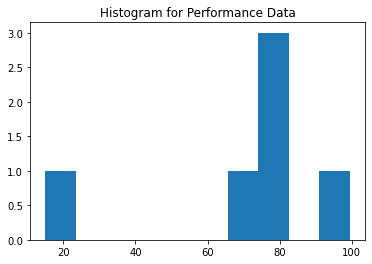

In [71]:
import matplotlib.pyplot as plt
plt.hist(Data['Performance'])
plt.title('Histogram for Performance Data');
#data.plot.hist()

### Purpose of kde plot, how we move from histogram to density curve, refer video-

https://www.youtube.com/watch?v=PUvUQMQ7xQk


If there are millions of data points looking at the absolute number of counts is not so useful, rather the percentage that fits into each category is a lot more useful.


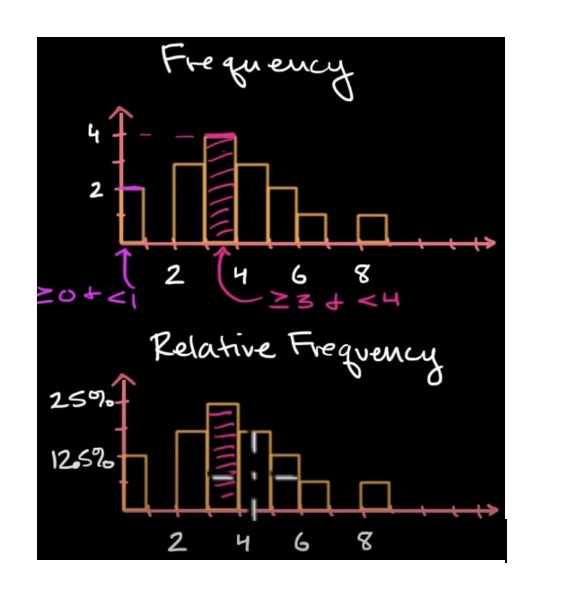

**Histogram to Density Curve** - Discrete Distributions to Continuous<br>

You want to go granular & granular. u r approaching a point where u have infinite categories & where each categories/buckets is infinitely thin such that if u just connect the tops of the bars that u will actually get a curve.
This type of curve is what we actually use in statistics & called as density curve.

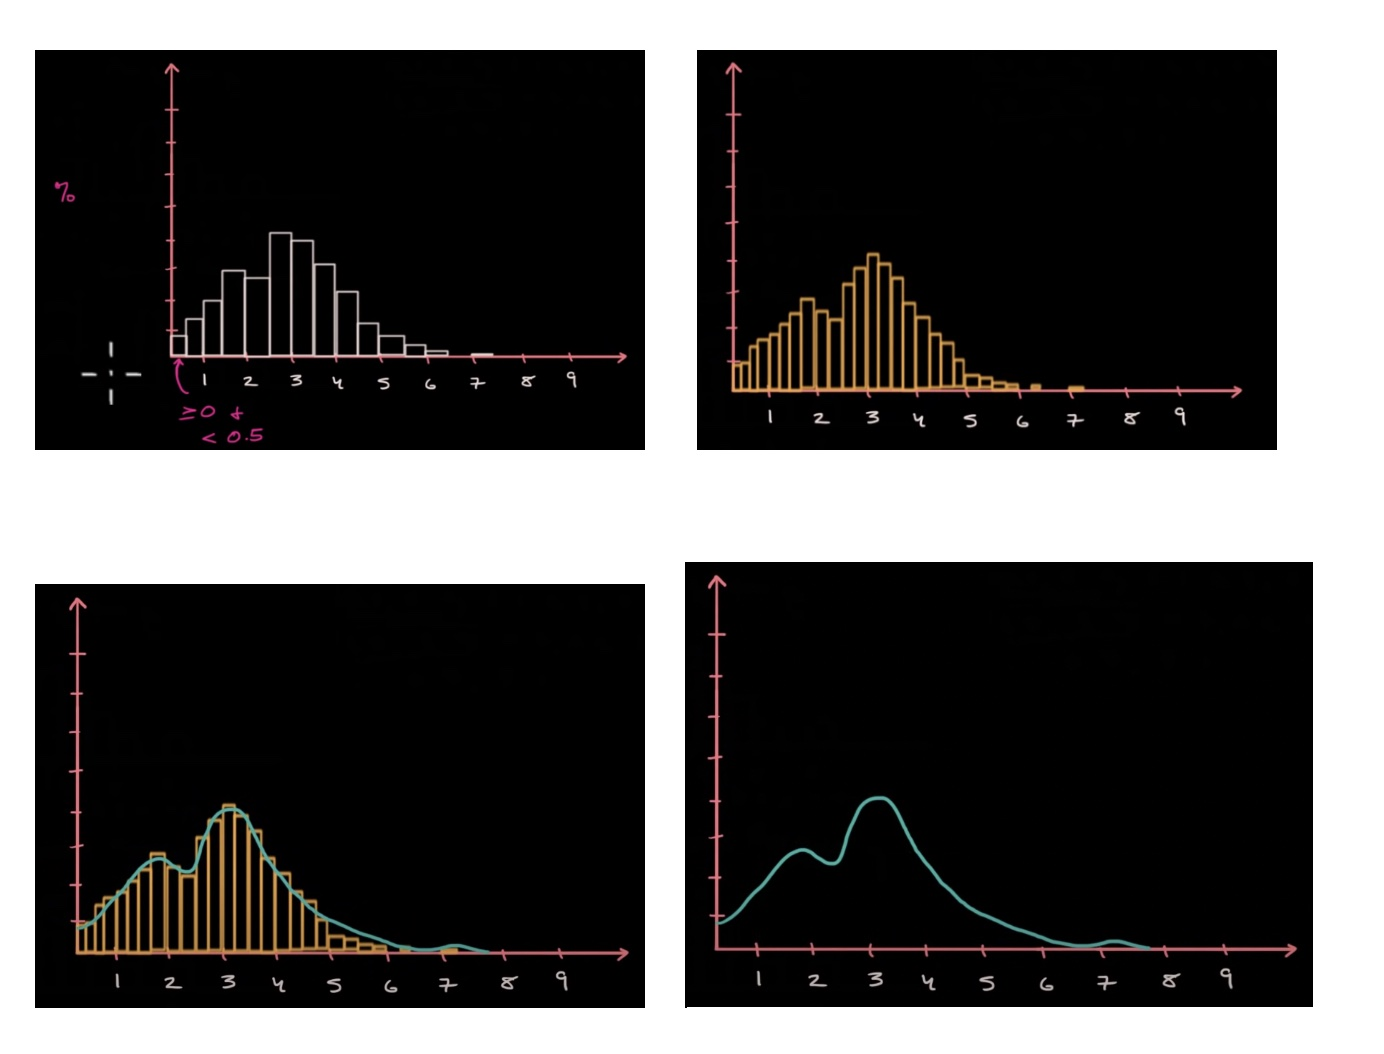

The area under density curve is 100% or 1.0.<br> 
**This is true for any density curve**
A density curve will also never take a -ve value or dip down towards -ve y.

What is valuable about Density Curve?

It is a visualization of the distribution where the data points can take any value in a continue, they are not just prone into coarse buckets.


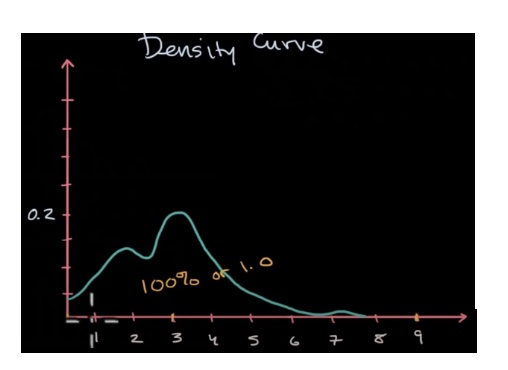

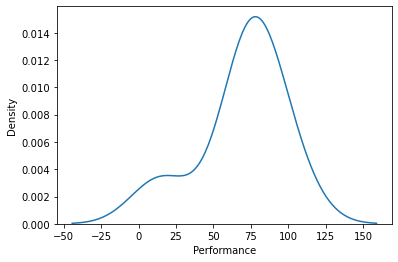

In [73]:
import seaborn as sns
sns.kdeplot(Data['Performance']);   # kernel density estimation/density curve

# y axis height is no significance if you have to tell value, 
# u need to calculate area under curve fo the value.

In [74]:
from scipy.stats import skew
print('\nSkewness for data : ', skew(Data['Performance']))


Skewness for data :  -1.255996322397883


In [134]:
Data['Performance']

0    75.0
1    76.0
2    15.0
3    99.5
4    73.5
5    75.7
Name: Performance, dtype: float64

In [75]:
# Removing identified outliers as per boxplot
Data_New=Data['Performance'].drop([2, 3])
Data_New

0    75.0
1    76.0
4    73.5
5    75.7
Name: Performance, dtype: float64

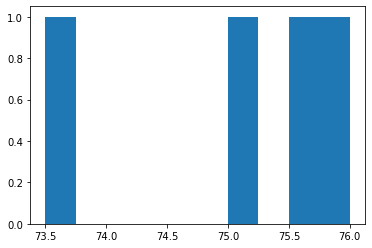

In [76]:
plot.hist(Data_New);

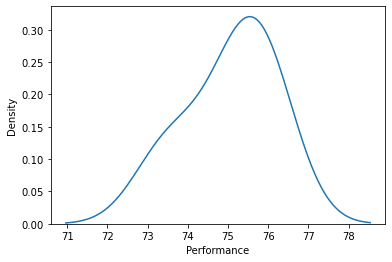

In [77]:
import seaborn as sns
sns.kdeplot(Data_New);

In [140]:
# Without outliers the skewness value has been reduced.
print('\nSkewness for data : ', skew(Data_New))


Skewness for data :  -0.7196175479997029


**Observation from above kde plots and skew calculations** -

Before removing outliers, skew value is -1.255996322397883<br>
After removing outliers, skew value is -0.7196175479997029

Hence removing outliers reduces skew in data.

In [142]:
# Practical example-1
diamonds = pd.read_csv("diamonds.csv")
diamonds.head()
diamonds=diamonds.dropna()
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [143]:
diamonds['carat'].head(n=10)

0    0.23
1    0.21
2    0.23
3    0.29
4    0.31
5    0.24
6    0.24
7    0.26
8    0.22
9    0.23
Name: carat, dtype: float64

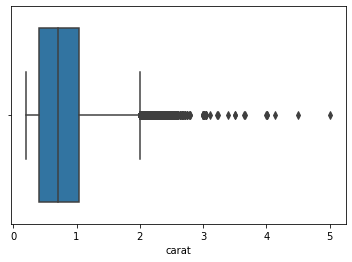

In [144]:
import matplotlib.pyplot as plt
sns.boxplot(x=diamonds['carat'])
plt.show()
#this column has outliers (it is shown at boxplot)

In [145]:
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

### Purpose of taking log

- to reduce skew
- to reduce outliers

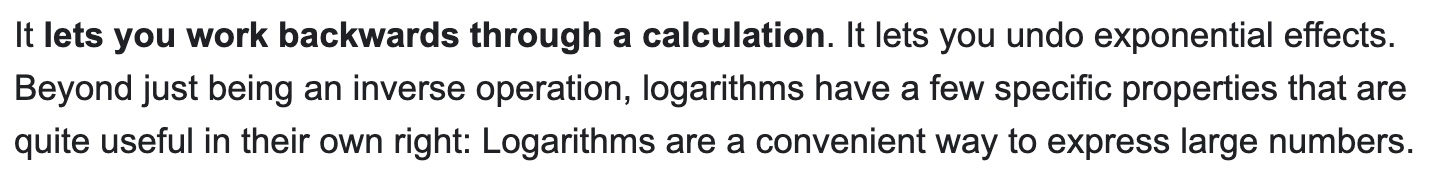

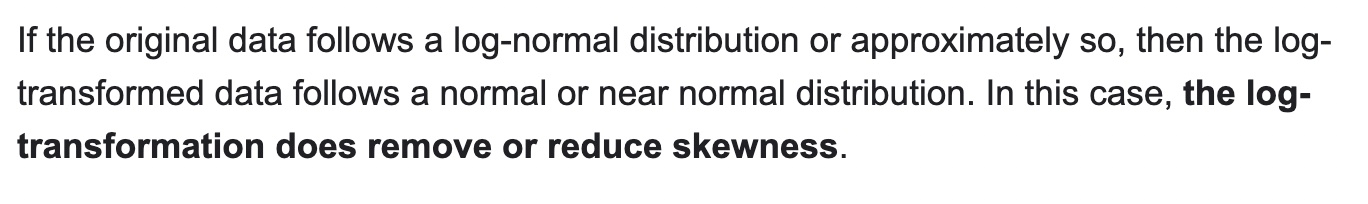

In [146]:
df_carat_log=np.log(diamonds['carat'])
df_carat_log.head()

0   -1.469676
1   -1.560648
2   -1.469676
3   -1.237874
4   -1.171183
Name: carat, dtype: float64

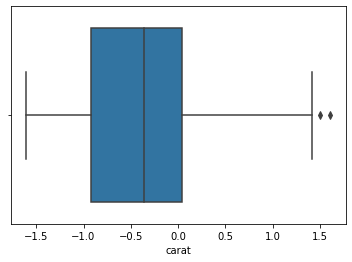

In [147]:
sns.boxplot(x=df_carat_log)
plt.show()

In [148]:
# # Practical example-2
data = pd.read_csv('employees_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:ylabel='MonthlyIncome'>

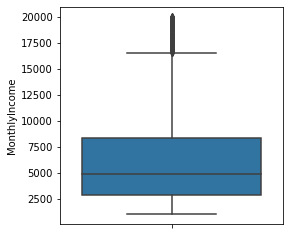

In [149]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, y='MonthlyIncome')

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

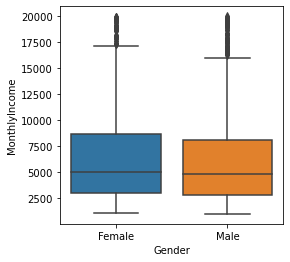

In [150]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, x='Gender', y='MonthlyIncome')

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

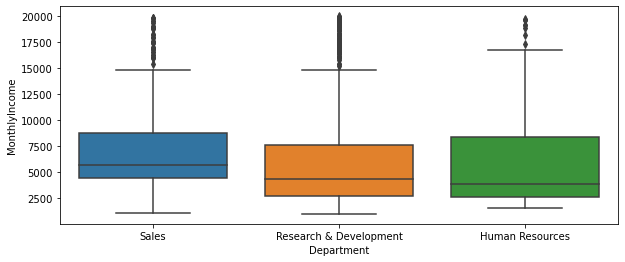

In [151]:
plt.figure(figsize=(10,4))
sns.boxplot(data=data, x='Department', y='MonthlyIncome')

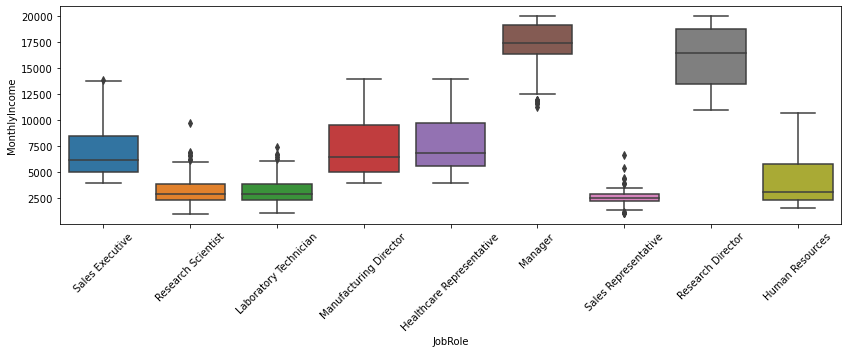

In [152]:
plt.figure(figsize=(14,4))
sns.boxplot(data=data, x='JobRole', y='MonthlyIncome')
plt.xticks(rotation=45)
plt.show()

In [153]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [154]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [155]:
sales_rep = data[data['JobRole'] == 'Sales Representative']
q1 = sales_rep['MonthlyIncome'].quantile(0.25)
q3 = sales_rep['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr
lw, uw

(1307.25, 3821.25)

In [156]:
sales_outliers = sales_rep[(sales_rep['MonthlyIncome'] < lw) | 
                           (sales_rep['MonthlyIncome'] > uw)]
sales_outliers

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
238,32,0,Travel_Rarely,1401,Sales,4,2,Life Sciences,1,330,...,1,80,1,6,5,3,4,3,1,2
301,18,0,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,1,80,0,0,2,3,0,0,0,0
539,50,0,Travel_Rarely,316,Sales,8,4,Marketing,1,738,...,4,80,1,4,2,3,2,2,2,2
564,45,0,Travel_Rarely,954,Sales,2,2,Technical Degree,1,783,...,1,80,0,9,3,3,8,7,3,1
764,28,0,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,...,2,80,0,1,5,3,1,0,0,0
911,25,1,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,...,4,80,0,1,4,3,1,0,1,0
1021,25,1,Travel_Rarely,383,Sales,9,2,Life Sciences,1,1439,...,1,80,0,6,2,3,3,2,2,2
1220,36,0,Travel_Rarely,530,Sales,2,4,Life Sciences,1,1710,...,3,80,0,17,2,2,13,7,6,7
1308,38,0,Travel_Rarely,723,Sales,2,4,Marketing,1,1835,...,1,80,2,20,4,2,4,2,0,3
1338,30,1,Travel_Rarely,945,Sales,9,3,Medical,1,1876,...,3,80,0,1,3,2,1,0,0,0


In [157]:
sales_outliers.index.tolist()

[238, 301, 539, 564, 764, 911, 1021, 1220, 1308, 1338, 1365]

<AxesSubplot:ylabel='Frequency'>

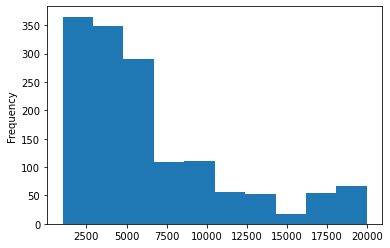

In [158]:
data.MonthlyIncome.plot.hist()

<AxesSubplot:ylabel='Density'>

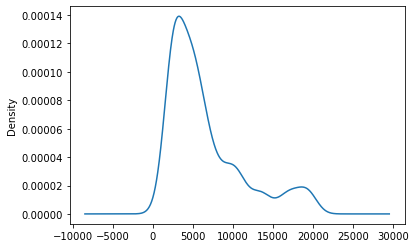

In [159]:
data.MonthlyIncome.plot.kde()

In [160]:
data.MonthlyIncome.skew()

1.3698166808390662

<AxesSubplot:ylabel='Density'>

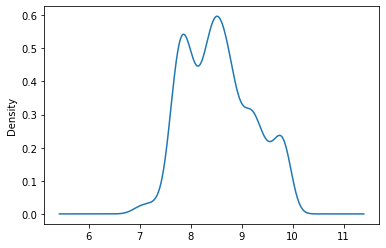

In [161]:
#np.log(data.MonthlyIncome).plot.kde()
DATA=np.log(data.MonthlyIncome)
DATA.plot.kde()

In [162]:
np.log(data.MonthlyIncome).skew()

0.2861922926389174

In [163]:
np.timedelta64

numpy.timedelta64

## 5 - Handling Binning or Bucketing of columns 

Activity:
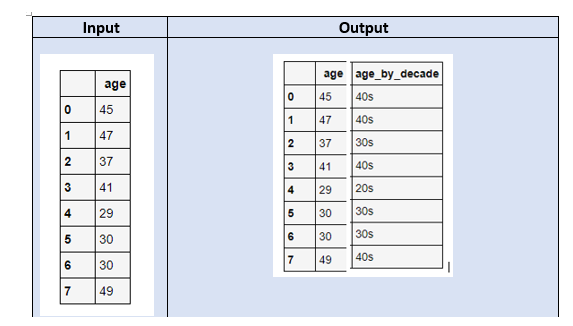

In [104]:
# Binning of numerical columns
# segment and sort data values into bins

df_ages = pd.DataFrame({'age': [45,37,41,29,49,40,20,21,30,50,51]})
df_ages 

,age
0,45
1,37
2,41
3,29
4,49
5,40
6,20
7,21
8,30
9,50


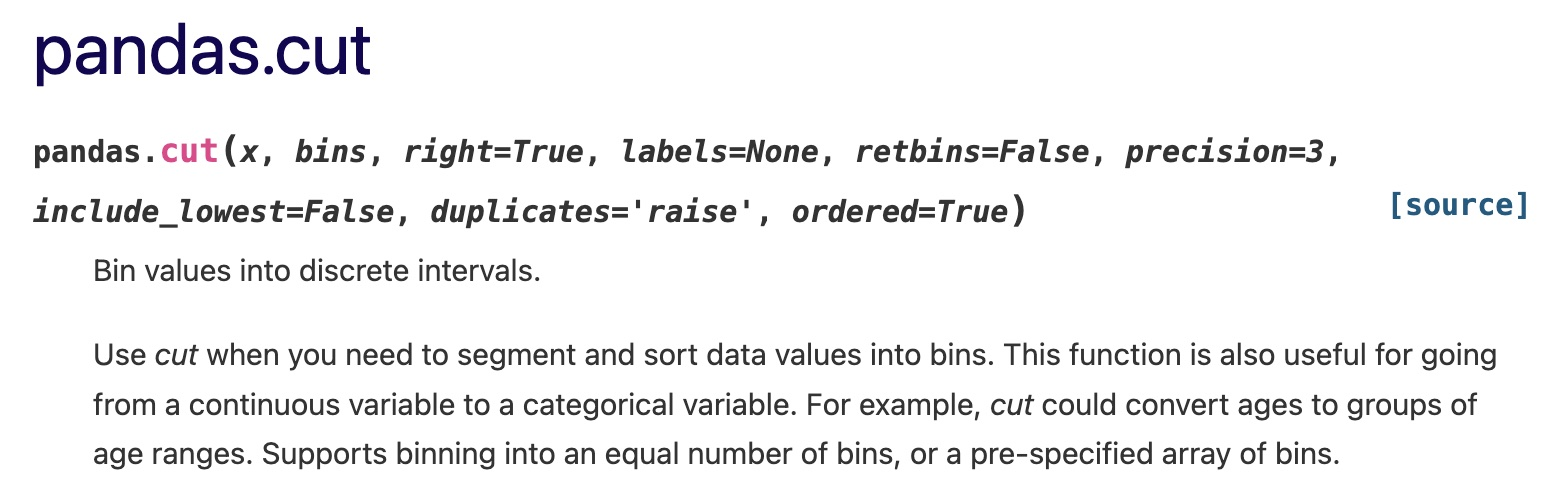

In [105]:
df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=4)
df_ages

,age,age_by_decade
0,45,"(43.25, 51.0]"
1,37,"(35.5, 43.25]"
2,41,"(35.5, 43.25]"
3,29,"(27.75, 35.5]"
4,49,"(43.25, 51.0]"
5,40,"(35.5, 43.25]"
6,20,"(19.969, 27.75]"
7,21,"(19.969, 27.75]"
8,30,"(27.75, 35.5]"
9,50,"(43.25, 51.0]"


**In pd.cut, lower value will not be included while upper value will be included**

20-30 -> 20 will not be included but 30 will be included.<br>
30-40 -> 30 will not be included but 40 will be included.<br>
40-50 -> 40 will not be included but 50 will be included.

In [106]:
df_ages['age_bins'] = pd.cut(x=df_ages['age'], bins=[20,30,40,50])
df_ages

# Since bin start from 20, any value less than or = 20 will be Nan in bin column.
# Next bin cut is at 30, so 30 will be included in 20-30.
# This means the lower value is not included in a bin range while upper value is.
# 50 is last value & bin is 40-50, so 50 will be included in this bin as upper value.

,age,age_by_decade,age_bins
0,45,"(43.25, 51.0]","(40.0, 50.0]"
1,37,"(35.5, 43.25]","(30.0, 40.0]"
2,41,"(35.5, 43.25]","(40.0, 50.0]"
3,29,"(27.75, 35.5]","(20.0, 30.0]"
4,49,"(43.25, 51.0]","(40.0, 50.0]"
5,40,"(35.5, 43.25]","(30.0, 40.0]"
6,20,"(19.969, 27.75]",NaN
7,21,"(19.969, 27.75]","(20.0, 30.0]"
8,30,"(27.75, 35.5]","(20.0, 30.0]"
9,50,"(43.25, 51.0]","(40.0, 50.0]"


In [167]:
df_ages['age_bins'] = pd.cut(x=df_ages['age'], bins=[19,29,39, 49])
df_ages

,age,age_by_decade,age_bins
0,45,"(44.0, 49.0]","(39, 49]"
1,47,"(44.0, 49.0]","(39, 49]"
2,37,"(34.0, 39.0]","(29, 39]"
3,41,"(39.0, 44.0]","(39, 49]"
4,29,"(28.98, 34.0]","(19, 29]"
5,30,"(28.98, 34.0]","(29, 39]"
6,30,"(28.98, 34.0]","(29, 39]"
7,49,"(44.0, 49.0]","(39, 49]"


In [168]:
df_ages['age_by_decade'] = pd.cut(x=df_ages['age'], bins=[19,29,39, 49], labels=['20s', '30s', '40s'])

In [169]:
df_ages

,age,age_by_decade,age_bins
0,45,40s,"(39, 49]"
1,47,40s,"(39, 49]"
2,37,30s,"(29, 39]"
3,41,40s,"(39, 49]"
4,29,20s,"(19, 29]"
5,30,30s,"(29, 39]"
6,30,30s,"(29, 39]"
7,49,40s,"(39, 49]"


In [170]:
df_ages[['age','age_by_decade']]

,age,age_by_decade
0,45,40s
1,47,40s
2,37,30s
3,41,40s
4,29,20s
5,30,30s
6,30,30s
7,49,40s


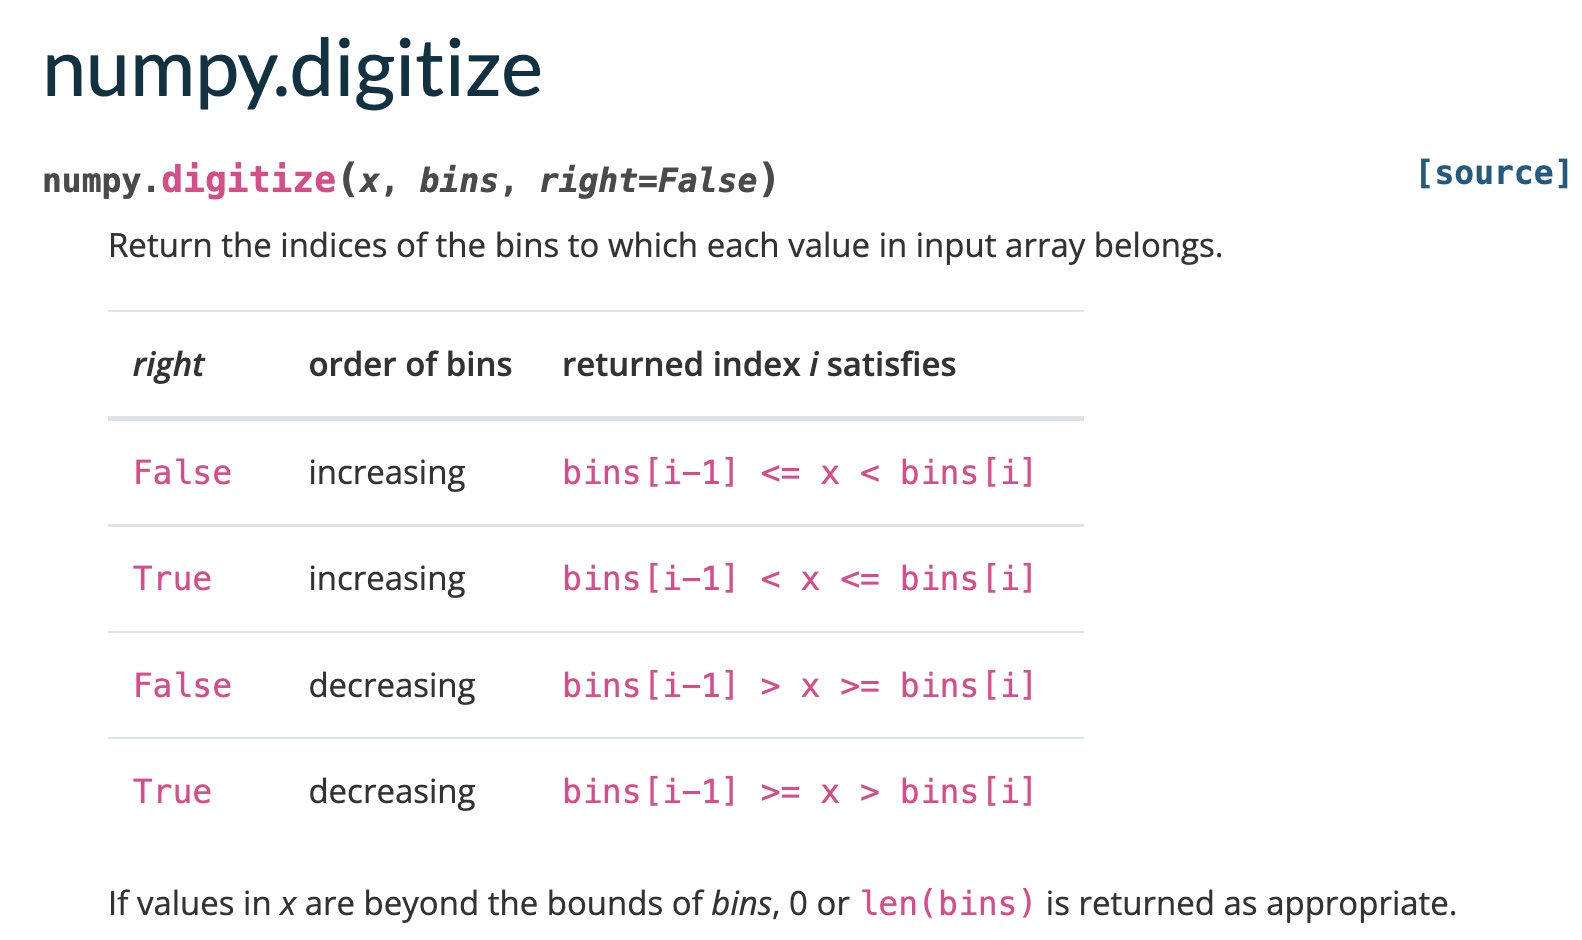

**Note**

In np.digize bins, lower limit of bin is included & upper limit not included.

0-1990 -> 0 will be included in this bin while 1990 will not be included
1990-2000 -> 1990 will be included in this bin while 2000 will not be included.

In [171]:
#Example np.digitize - returns indices of the bins

x=[1990,1975,2004,1995,2005,2011,2010]
year_bins=[1990,2000,2010]

np.digitize(x,bins=year_bins)

array([1, 0, 2, 1, 2, 3, 3])